In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pickle as pkl
import json
import requests
from CP_trend import *
from pandas.io.json import json_normalize
#import statsmodels.api as sm
import itertools
from sklearn.cluster import KMeans

%load_ext autoreload
%autoreload 2
%load_ext autotime

In [3]:
search_data = pkl.load(open("./data/search_data_2019-09.pkl", "rb"))
trends = ['neon', 'paper bag waist', 'high waisted jeans','animal print', 'open shoulder', 'puff sleeve', 'black cargo pants']
trends_t0 = [return_t0(t,search_data) for t in trends]
market_data = pd.read_csv('df_cnt_comb120119.csv',index_col=0)
week_cols = ['3/25/18', '4/1/18', '4/8/18', '4/15/18', '4/22/18', '4/29/18',
       '5/6/18', '5/13/18', '5/20/18', '5/27/18', '6/3/18', '6/10/18',
       '6/17/18', '6/24/18', '7/1/18', '7/8/18', '7/15/18', '7/22/18',
       '7/29/18', '8/5/18', '8/12/18', '8/19/18', '8/26/18', '9/2/18',
       '9/9/18', '9/16/18', '9/23/18', '9/30/18', '10/7/18', '10/14/18',
       '10/21/18', '10/28/18', '11/4/18', '11/11/18', '11/18/18', '11/25/18',
       '12/2/18', '12/9/18', '12/16/18', '12/23/18', '12/30/18', '1/6/19',
       '1/13/19', '1/20/19', '1/27/19', '2/3/19', '2/10/19', '2/17/19',
       '2/24/19', '3/3/19', '3/10/19', '3/17/19', '3/24/19', '3/31/19',
       '4/7/19', '4/14/19', '4/21/19', '4/28/19', '5/5/19', '5/12/19',
       '5/19/19', '5/26/19', '6/2/19', '6/9/19', '6/16/19', '6/23/19',
       '6/30/19', '7/7/19', '7/14/19', '7/21/19', '7/28/19', '8/4/19',
       '8/11/19', '8/18/19', '8/25/19', '9/1/19', '9/8/19', '9/15/19',
       '9/22/19', '9/29/19', '10/6/19', '10/13/19', '10/20/19']
combined_df = combined_retailers_and_trends(search_data,market_data,trends,week_cols)

calculating t0 for neon
calculating t0 for paper bag waist
calculating t0 for high waisted jeans
calculating t0 for animal print
calculating t0 for open shoulder
calculating t0 for puff sleeve
calculating t0 for black cargo pants
calculating t0 for neon
calculating t0 for paper bag waist
calculating t0 for high waisted jeans
calculating t0 for animal print
calculating t0 for open shoulder
calculating t0 for puff sleeve
calculating t0 for black cargo pants
calculating t0 for neon
calculating t0 for paper bag waist
calculating t0 for high waisted jeans
calculating t0 for animal print
calculating t0 for open shoulder
calculating t0 for puff sleeve
calculating t0 for black cargo pants
time: 12.3 s


In [4]:
cluster_df = combined_weighted_data(combined_df, market_data, week_cols)
cluster_df

,retailer,Market Index,weighted_delta_t0_wk,weighted_del_log_slope
0,Alice + Olivia,Contemporary Index,10.673188,-1.463020
0,Isabel Marant,Contemporary Index,22.000000,-3.582667
0,Sandro,Contemporary Index,49.273438,-3.728646
0,AllSaints,Contemporary Index,3.937973,-0.459827
0,Acne Studios,Contemporary Index,17.636719,-3.121026
...,...,...,...,...
0,J.Crew,Specialty/DTC Index,5.465033,-0.453653
0,Ann Taylor,Specialty/DTC Index,5.575623,-0.725137
0,Banana Republic,Specialty/DTC Index,3.028098,-0.500984
0,Reformation,Specialty/DTC Index,11.380326,-1.107729


time: 1.81 s


In [ ]:
# def kMeansClustering(cluster_df, k, makeplot=False):
#     #add market index label
#     market_indices = np.unique(cluster_df['Market Index'].values)
#     market_index_labels = {market_indices[i]:i for i in range(len(market_indices))} #map
#     X = cluster_df[['weighted_delta_t0_wk','weighted_del_log_slope','Market Index']]
#     X['Market Index Label'] = X['Market Index'].map(market_index_labels)
    
#     #perform kmeans clustering
#     kmeans = KMeans(n_clusters=k)
#     x = X['weighted_delta_t0_wk']
#     y = X['weighted_del_log_slope']
#     y_pred = kmeans.fit_predict(X[['weighted_delta_t0_wk','weighted_del_log_slope']])
    
#     if makeplot:
#         #plot actual clusters
#         plt.scatter(x,y,c=X['Market Index Label'])
#         plt.title("Actual Clusters")
#         plt.show()
        
#         #plot predicted clusters
#         plt.scatter(x,y_pred,c=y_pred)
#         plt.title("Predicted Clusters")
#         plt.show()

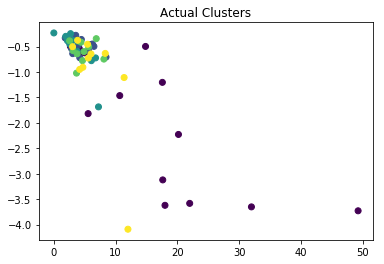

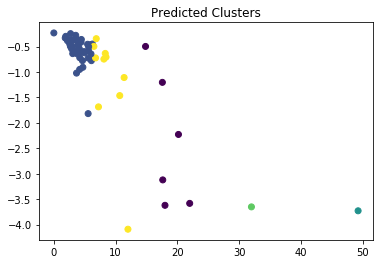

time: 293 ms


In [6]:
kMeansClustering(cluster_df,5,makeplot=True)